# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#JB add this so we don't get popups
%matplotlib inline

In [26]:
df=pd.read_csv("../assets/billboard.csv")

##### Write a brief description of your data, and any interesting observations you've made thus far. 

In [27]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.dtypes


year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

In [29]:
# Dropping the years column, its redundant
dfCl = df.drop("year", axis=1)
dfCl.head()

,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Changing headers to get rid of periods
# Change time to timeInS -- convert time to seconds later
dfCl.rename(columns={"artist.inverted": "artist", "time" : "timeInS","date.entered" : "dateEntered","date.peaked" : "datePeaked"}, inplace=True)
dfCl.head()

,artist,track,timeInS,genre,dateEntered,datePeaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#dfCl.timeInS

In [32]:
#convert the object values in the time column to seconds
def makeTimeToSeconds(val):
    val = val.split(":")
    minutes = val[0]
    seconds = val[1]
    duration = (int(minutes)*60) + int(seconds)
    return duration
    

dfCl["timeInS"] = dfCl.timeInS.apply(makeTimeToSeconds)
#dfCl.drop("timeInS", inplace = True)
dfCl.head()

,artist,track,timeInS,genre,dateEntered,datePeaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
dfCl.head()

,artist,track,timeInS,genre,dateEntered,datePeaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#change the dates peaked/entered columns from an object to datetime
dfCl["dateEntered"] = pd.to_datetime(dfCl['dateEntered'])
dfCl["datePeaked"] = pd.to_datetime(dfCl['datePeaked'])

dfCl.dtypes


artist                 object
track                  object
timeInS                 int64
genre                  object
dateEntered    datetime64[ns]
datePeaked     datetime64[ns]
x1st.week               int64
x2nd.week             float64
x3rd.week             float64
x4th.week             float64
x5th.week             float64
x6th.week             float64
x7th.week             float64
x8th.week             float64
x9th.week             float64
x10th.week            float64
x11th.week            float64
x12th.week            float64
x13th.week            float64
x14th.week            float64
x15th.week            float64
x16th.week            float64
x17th.week            float64
x18th.week            float64
x19th.week            float64
x20th.week            float64
x21st.week            float64
x22nd.week            float64
x23rd.week            float64
x24th.week            float64
                    ...      
x47th.week            float64
x48th.week            float64
x49th.week

In [35]:
#remove the x from the week headers
#dfCl.columns = [x.strip("x") for x in dfCl.columns]


In [36]:
dfCl.head()

,artist,track,timeInS,genre,dateEntered,datePeaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [37]:
dfClm = pd.melt(dfCl,
                id_vars =["artist","track","timeInS","genre","dateEntered","datePeaked"], 
                value_vars=list(dfCl.ix[:,"x1st.week":"x76th.week"]),
                var_name = "week",
                value_name= "chart pos"
               )

dfClm.head()

,artist,track,timeInS,genre,dateEntered,datePeaked,week,chart pos
0,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,Madonna,Music,225,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,x1st.week,57.0


In [38]:
#continued cleaning
#changing weeks to int

def cleanWeekColumn(val):
    #split value into a list on the '.': x1st.week to [x1st,week] and select x1st(index 0)
    val = val.split(".")[0] 
    #create a list of strings to be removed
    badChars = ["x", "st","th","nd","rd"]
    #loop iterating over unwanted characters
    for char in badChars:
        #and replacing any found with "nothing" 
        val = val.replace(char,"")
    #return the replace value
    return int(val)
#apply the cleaning function to all cells in the column week.    
dfClm["week"] = dfClm.week.apply(cleanWeekColumn)


In [39]:
#dfClm.to_csv("../assets/bbclean.csv")

In [40]:
dfClm.head()

,artist,track,timeInS,genre,dateEntered,datePeaked,week,chart pos
0,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,1,78.0
1,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,1,15.0
2,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,1,71.0
3,Madonna,Music,225,Rock,2000-08-12,2000-09-16,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,1,57.0


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [41]:
dfClm.describe()

,timeInS,week,chart pos
count,24092.000000,24092.000000,5307.000000
mean,242.425868,38.500000,51.052384
std,42.335564,21.937866,28.966198
min,156.000000,1.000000,1.000000
25%,219.000000,19.750000,26.000000
50%,236.000000,38.500000,51.000000
75%,257.000000,57.250000,76.000000
max,470.000000,76.000000,100.000000


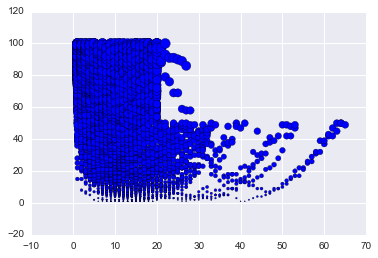

In [42]:
#week vs chart position
plt.scatter(dfClm["week"],dfClm["chart pos"],s=dfClm['chart pos'])
plt.show()

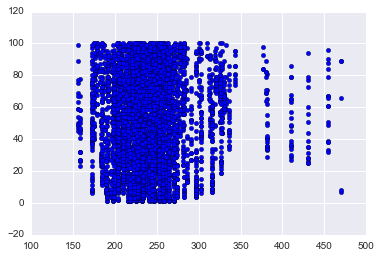

In [47]:
plt.scatter(dfClm["timeInS"],dfClm["chart pos"])
plt.show()

In [ ]:
#JB I need intel on these charts, what are we looking at? What's interesting?

In [44]:
%%html
<div class='tableauPlaceholder' id='viz1478541277244' style='position: relative'><noscript><a href='#'><img alt='Song Genre representation in top 100 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book1_15662&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='Book1_15662&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book1_15662&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1478541277244');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [48]:
%%html
<div class='tableauPlaceholder' id='viz1478541143494' style='position: relative'><noscript><a href='#'><img alt='Average position of a Genre by week ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_4920&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='Book3_4920&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_4920&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1478541143494');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
#JB this is a nice viz, but the yaxis makes no sense due to stacking the bars. I'd say five lines on a graph
# would be more intuitive. Plus, need conclusions!

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

Does the presence of Billboards recurrents program significantly impact record sales? Recurrents drops songs around the 20th week from the list. Interrupting their natural decline. This might be beyond the scope of the current project but I would need sales data corresponding to the date. There are genres that completely drop from the charts.

In [ ]:
#JB 20th week is an issue, but come up with a creative context for future weeks, like artists that are financially
# impacted by the 20-week rule, so they want you to find ways to improve ranking, etc.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

- analaysis of data by artist/week position to sales datas per week
- forecasting the popularity of songs before they are dropped and interpreting their position in relation to their sales data per week.


## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

In [49]:
https://breakingdatascience.wordpress.com/
    
#JB made this markdown, since it's not code. Great start! Add more context on your data and what your strategy/intent are

SyntaxError: invalid syntax (<ipython-input-49-b7fcc399a831>, line 1)

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 

Score | 16/24
----- | ------
Identify: Problem Statement / Hypothesis	| 2
Identify: Risks & Assumptions				| 2
Acquire: Import Data Using Pandas			| 3
Parse: Perform EDA Using Pandas				| 2
Viz: Tableau Dashboard and Plots			| 2
Mine: Determine Correlations				| 0
Refine: Evaluate Findings				    | 2
Present: Describe Results in Blog Post		| 3
Bonus! Present: Write a short White Paper	| /5

#JB The foundation is there; I would love to see more creativity and curiosity in your EDA, coupled with a watertight recommendation/executive summary of your work.